## Data Combination and Data Cleaning

**Speech Dataset**

In [31]:
# Load speech dataframe
import os
import numpy as np
import pandas as pd

sessions = np.arange(25, 76)
data=[]

for session in sessions:
    directory = "Session "+str(session)+" - "+str(1945+session)
    #directory = "./TXT/Session "+str(session)+" - "+str(1945+session)
    for filename in os.listdir(directory):
        f = open(os.path.join(directory, filename), encoding="utf8")
        if filename[0]==".": #ignore hidden files
            continue
        splt = filename.split("_")
        data.append([session, 1945+session, splt[0], f.read()])

        
df_speech = pd.DataFrame(data, columns=['Session','Year','ISO-alpha3 Code','Speech'])
df_speech['ISO-alpha3 Code'] = df_speech['ISO-alpha3 Code'].str.replace('POR','PRT') #change one ISO alpha code mistake where the code for Portugal was misspecified

**Country-Name Dataset**

In [32]:
# Load UNSD dataframe(basically is the country-name dataset)
n = 16 #define the columns

# Load all the data using lineterminator = '\n' to get all the  
# columns that are misplaced because of the ',' inside them
unsd_df = pd.read_csv('UNSD — Methodology.csv', usecols=range(n), lineterminator='\n')
unsd_df

,Global Code,Global Name,Region Code,Region Name,Sub-region Code,Sub-region Name,Intermediate Region Code,Intermediate Region Name,Country or Area,M49 Code,ISO-alpha2 Code,ISO-alpha3 Code,Least Developed Countries (LDC),Land Locked Developing Countries (LLDC),Small Island Developing States (SIDS),Developed / Developing Countries\r
0,1,World,2.0,Africa,15.0,Northern Africa,NaN,NaN,Algeria,012,DZ,DZA,NaN,NaN,NaN,Developing\r
1,1,World,2.0,Africa,15.0,Northern Africa,NaN,NaN,Egypt,818,EG,EGY,NaN,NaN,NaN,Developing\r
2,1,World,2.0,Africa,15.0,Northern Africa,NaN,NaN,Libya,434,LY,LBY,NaN,NaN,NaN,Developing\r
3,1,World,2.0,Africa,15.0,Northern Africa,NaN,NaN,Morocco,504,MA,MAR,NaN,NaN,NaN,Developing\r
4,1,World,2.0,Africa,15.0,Northern Africa,NaN,NaN,Sudan,729,SD,SDN,x,NaN,NaN,Developing\r
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
244,1,World,9.0,Oceania,61.0,Polynesia,NaN,NaN,Samoa,882,WS,WSM,NaN,NaN,x,Developing\r
245,1,World,9.0,Oceania,61.0,Polynesia,NaN,NaN,Tokelau,772,TK,TKL,NaN,NaN,NaN,Developing\r
246,1,World,9.0,Oceania,61.0,Polynesia,NaN,NaN,Tonga,776,TO,TON,NaN,NaN,x,Developing\r
247,1,World,9.0,Oceania,61.0,Polynesia,NaN,NaN,Tuvalu,798,TV,TUV,x,NaN,x,Developing\r


In [33]:
# Rename last column - remove the space(\s)
unsd_df.rename(columns={'Developed / Developing Countries\r': 'Developed / Developing Countries'}, inplace=True)

In [34]:
# Complete/Combine the name of the "Country or Area" that was misplaced into  
# the M49 Code column and adjust all other columns

for i,j in unsd_df["M49 Code"].items():
    if(len(j)>3):
        unsd_df.iloc[i, unsd_df.columns.get_loc('Country or Area')] += j
        unsd_df.iloc[i, unsd_df.columns.get_loc('M49 Code')] = unsd_df.iloc[i, unsd_df.columns.get_loc('ISO-alpha2 Code')]
        unsd_df.iloc[i, unsd_df.columns.get_loc('ISO-alpha2 Code')] = unsd_df.iloc[i, unsd_df.columns.get_loc('ISO-alpha3 Code')]
        unsd_df.iloc[i, unsd_df.columns.get_loc('ISO-alpha3 Code')] = unsd_df.iloc[i, unsd_df.columns.get_loc('Least Developed Countries (LDC)')]
        unsd_df.iloc[i, unsd_df.columns.get_loc('Least Developed Countries (LDC)')] = unsd_df.iloc[i, unsd_df.columns.get_loc('Land Locked Developing Countries (LLDC)')]
        unsd_df.iloc[i, unsd_df.columns.get_loc('Land Locked Developing Countries (LLDC)')] = unsd_df.iloc[i, unsd_df.columns.get_loc('Small Island Developing States (SIDS)')]        
        unsd_df.iloc[i, unsd_df.columns.get_loc('Small Island Developing States (SIDS)')] = unsd_df.iloc[i, unsd_df.columns.get_loc('Developed / Developing Countries')]
        unsd_df.iloc[i, unsd_df.columns.get_loc('Developed / Developing Countries')] = "Developing"

In [35]:
# Merge Speech and Country-Name dataframe
speech_and_unsd_df = pd.merge(unsd_df, df_speech, on="ISO-alpha3 Code")

# Select specific columns to the final Speech and Country-Name dataframe
speech_and_countryName_df = speech_and_unsd_df[['Region Name', 'Country or Area', 'Session', 'Year', 'Speech']].copy()
speech_and_countryName_df

,Region Name,Country or Area,Session,Year,Speech
0,Africa,Algeria,25,1970,1. The delegation of Algeria is very pleased ...
1,Africa,Algeria,26,1971,\n154.\t : It is not only in order to keep up ...
2,Africa,Algeria,27,1972,"Mr. President, in electing you to preside over..."
3,Africa,Algeria,28,1973,"﻿121.\tMr. President, since a tradition appear..."
4,Africa,Algeria,29,1974,"Mr. President, it would be ungracious of the r..."
...,...,...,...,...,...
8380,Oceania,Tuvalu,71,2016,On behalf of the Government and people of Tuva...
8381,Oceania,Tuvalu,72,2017,"Next week, on 1 October, Tuvalu will mark the ..."
8382,Oceania,Tuvalu,73,2018,"It gives me great pleasure, on behalf of the G..."
8383,Oceania,Tuvalu,74,2019,"On behalf of Tuvalu and on my own behalf, I co..."


In [36]:
# Create indexes on the columns 'Country or Area' and 'Year' 
data_word_vector_df =speech_and_countryName_df.set_index(["Country or Area","Year"])

In [37]:
import nltk
from nltk.corpus import stopwords
from nltk import word_tokenize
from nltk.probability import FreqDist
import string

# Create all punctuation string variable
punct = '!"#$%&\'()*+0123456789,’-—./:;<=>?@[\\]^_`{}~[\n]'
# Create a mapping table that will have as key the punctuation and as value an empty string
transtab = str.maketrans(dict.fromkeys(punct, ''))

# Loop through all the cells of "Speech" column
for county_year_index,cell in data_word_vector_df["Speech"].items():
    # Remove all punctuations and convert the text to lowercase
    words = word_tokenize(cell.translate(transtab).lower())
    # Create an array that has all the words that don't give information
    notuseful_words = stopwords.words("english")
    # Create and fill an empty array to gather all the important words of every "Speech" cell
    useful_words = []
    for w in words:
        if (w not in notuseful_words) and (len(w) > 2):
            useful_words.append(w)
            #if((county_year_index[0]).lower() != w):
                #useful_words.append(w)
    # Fill the dataframe with the text of "Speech" for each cell
    data_word_vector_df["Speech"][county_year_index] = ' '.join(useful_words)
    data_word_vector_df_Count_Vec = data_word_vector_df


<ipython-input-37-306525bc0366>:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_word_vector_df["Speech"][county_year_index] = ' '.join(useful_words)


### Data Visualizations

#### Figure 1: How often did a country participate in the speech over the year

In [38]:
import geopandas as gpd
import pandas as pd
world = gpd.read_file(gpd.datasets.get_path("naturalearth_lowres"))

grouped_by_country = speech_and_countryName_df.groupby(['Country or Area'])['Speech'].count()
df1= pd.DataFrame(grouped_by_country.index)
df2 = pd.DataFrame(grouped_by_country.values, columns=['Speech'])
grouped_by_country_df = df1.join(df2)

In [39]:
#to manage inconsistencies between name sof countries in different datasets
r = {
  'Bolivia': 'Bolivia (Plurinational State of)',
  'Bosnia and Herz.': 'Bosnia and Herzegovina',
  'Brunei': 'Brunei Darussalam',
  'Central African Rep.': 'Central African Republic',
  'North Korea': "Democratic People's Republic of Korea",
  'Dem. Rep. Congo': 'Democratic Republic of the Congo',
  'Dominican Rep.': 'Dominican Republic',
  'Eq. Guinea': 'Equatorial Guinea',
  'eSwatini': 'Eswatini',
  'Iran': 'Iran (Islamic Republic of)',
  'Laos': "Lao People's Democratic Republic",
  'Macedonia': 'North Macedonia',
  'South Korea': 'Republic of Korea',
  'Moldova': 'Republic of Moldova',
  'Russia': 'Russian Federation',
  'Solomon Is.': 'Solomon Islands',
  'S. Sudan': 'South Sudan',
  'Palestine': 'State of Palestine',
  'Syria': 'Syrian Arab Republic',
  'United Kingdom': 'United Kingdom of Great Britain and Northern Ireland',
  'Tanzania': 'United Republic of Tanzania',
  'Venezuela': 'Venezuela (Bolivarian Republic of)',
  'Vietnam': 'Viet Nam'}

world2 = world.replace(to_replace=r ,value=None)
world_speeched_final = world2.merge(grouped_by_country_df, how="right", left_on=['name'], right_on=['Country or Area'] )

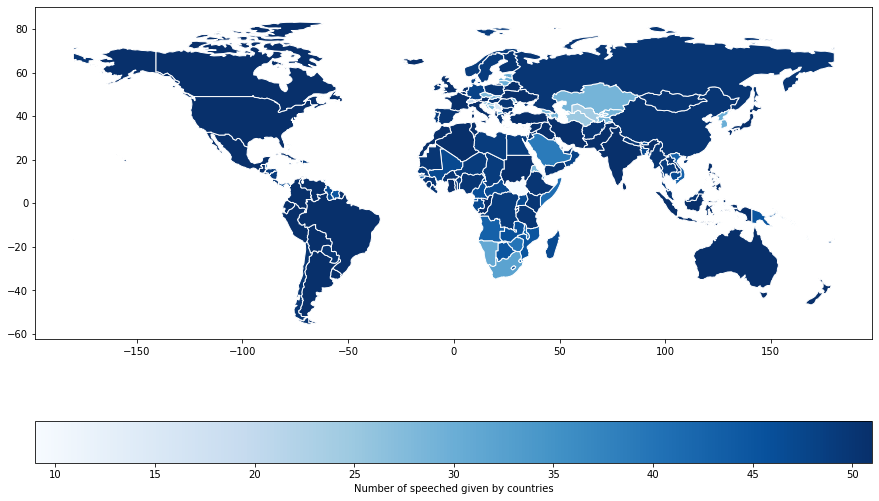

In [40]:
import matplotlib.pyplot as plt

ax = world_speeched_final.plot('Speech',
                           figsize=(15,10),
                           legend=True,
                           edgecolor="white",cmap='Blues',
                           legend_kwds={"label":"Number of speeched given by countries", "orientation":"horizontal"})

ax.figure.savefig('Figure1.eps')

In [41]:
#The following do not have a match in the world dataset not every countries has the coordinates in the world dataset
#world_speeched_final[world_speeched_final['pop_est'].isna()]

#### Figure 2 : allocation of speeches between regions

In [42]:
number_of_speeches_per_region = speech_and_countryName_df.groupby(['Region Name'])['Country or Area'].count()

In [43]:
number_of_countries_per_region = speech_and_countryName_df.groupby(['Region Name'])['Country or Area'].nunique()
number_of_countries_per_region.sum()
speech_and_countryName_df.groupby(['Region Name'])['Country or Area'].nunique()

Region Name
Africa      54
Americas    35
Asia        48
Europe      44
Oceania     14
Name: Country or Area, dtype: int64

In [44]:
number_of_speeches_per_region

Region Name
Africa      2426
Americas    1649
Asia        2076
Europe      1770
Oceania      464
Name: Country or Area, dtype: int64

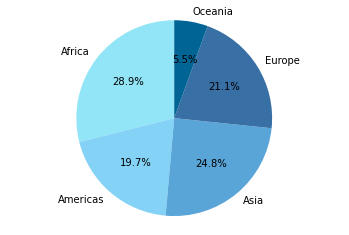

In [45]:
fig2, ax1 = plt.subplots()
ax1.pie(number_of_speeches_per_region.values, labels=number_of_speeches_per_region.index, autopct='%1.1f%%',
        shadow=False, startangle=90, colors = ['#91e5f6','#84d2f6', '#59a5d8', '#386fa4', '#006494' ])
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

ax1.figure.savefig('Figure2.eps')
plt.show()

#### Figure 3: World cloud after tokenizing

In [46]:
#using the data cleaned my Ilia in the first part of the jupiter notebook
data_word_vector_df =data_word_vector_df.dropna()
data_word_vector_df

Region Name  Session  \
Country or Area Year                        
Algeria         1970      Africa       25   
                1971      Africa       26   
                1972      Africa       27   
                1973      Africa       28   
                1974      Africa       29   
...                          ...      ...   
Tuvalu          2016     Oceania       71   
                2017     Oceania       72   
                2018     Oceania       73   
                2019     Oceania       74   
                2020     Oceania       75   

                                                                 Speech  
Country or Area Year                                                     
Algeria         1970  delegation algeria pleased see twentyfifth ses...  
                1971  order keep tradition shall start statement pre...  
                1972  president electing preside twentyseventh sessi...  
                1973  president since tradition appears established ...  
                1974  president would ungracious representative alge...  
...                                                                 ...  
Tuvalu          2016  behalf government people tuvalu bring greeting...  
                2017  next week october tuvalu mark thirtyninth anni...  
                2018  gives great pleasure behalf government people ...  
                2019  behalf tuvalu behalf congratulate sir election...  
                2020  president distinguished members general assemb...  

[8385 rows x 3 columns]

In [47]:
#make a list of the array, merge together the speeches into one list
tokenized_speeches = list((data_word_vector_df["Speech"].values))

In [48]:
#make one long string of all the words 
str_speeches =" ".join(tokenized_speeches)

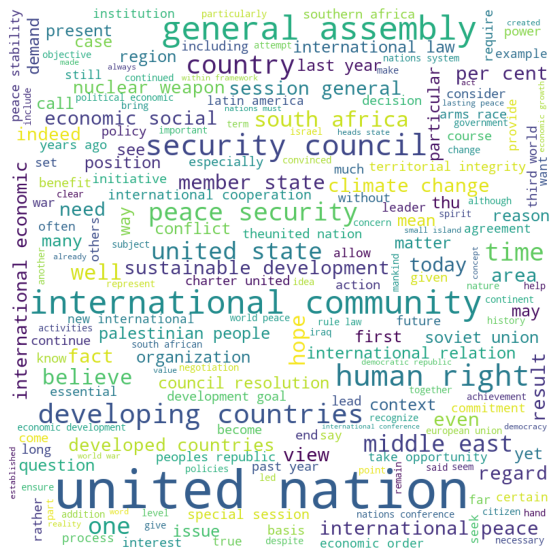

In [49]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import pandas as pd

def create_word_cloud(final_data):
        # initiate WordCloud object with parameters width, height, maximum font size and background color
        # call the generate method of WordCloud class to generate an image
        wordcloud = WordCloud(width=800, height=800, min_font_size=10, background_color="white").generate(final_data)
        # plt the image generated by WordCloud class
        wordcloud.to_file("Figure3.eps") 
        plt.figure(figsize=(12,10))
        plt.imshow(wordcloud)
        plt.axis("off")
        plt.show()
        
create_word_cloud(str_speeches)

#### Figure 4: GDP per capita for region

In [50]:
#calculate gdp per capita from world df
world_speeched_final['gdp_per_cap'] = world_speeched_final['gdp_md_est'] / world_speeched_final['pop_est']

In [51]:
#merge worls dataset with our data set
region_gdp_per_capita_world = world_speeched_final.merge(speech_and_countryName_df, how="right", left_on=['Country or Area'], right_on=['Country or Area'])

In [52]:
region_gdp_per_capita_world =region_gdp_per_capita_world.dropna()
region_gdp_per_capita_world

,pop_est,continent,name,iso_a3,gdp_md_est,geometry,Country or Area,Speech_x,gdp_per_cap,Region Name,Session,Year,Speech_y
0,40969443.0,Africa,Algeria,DZA,609400.0,"POLYGON ((-8.68440 27.39574, -8.66512 27.58948...",Algeria,51,0.014875,Africa,25,1970,1. The delegation of Algeria is very pleased ...
1,40969443.0,Africa,Algeria,DZA,609400.0,"POLYGON ((-8.68440 27.39574, -8.66512 27.58948...",Algeria,51,0.014875,Africa,26,1971,\n154.\t : It is not only in order to keep up ...
2,40969443.0,Africa,Algeria,DZA,609400.0,"POLYGON ((-8.68440 27.39574, -8.66512 27.58948...",Algeria,51,0.014875,Africa,27,1972,"Mr. President, in electing you to preside over..."
3,40969443.0,Africa,Algeria,DZA,609400.0,"POLYGON ((-8.68440 27.39574, -8.66512 27.58948...",Algeria,51,0.014875,Africa,28,1973,"﻿121.\tMr. President, since a tradition appear..."
4,40969443.0,Africa,Algeria,DZA,609400.0,"POLYGON ((-8.68440 27.39574, -8.66512 27.58948...",Algeria,51,0.014875,Africa,29,1974,"Mr. President, it would be ungracious of the r..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...
8184,282814.0,Oceania,Vanuatu,VUT,723.0,"MULTIPOLYGON (((167.21680 -15.89185, 167.84488...",Vanuatu,35,0.002556,Oceania,71,2016,Vanuatu would like to join previous speakers i...
8185,282814.0,Oceania,Vanuatu,VUT,723.0,"MULTIPOLYGON (((167.21680 -15.89185, 167.84488...",Vanuatu,35,0.002556,Oceania,72,2017,It is a great honour for me to make this state...
8186,282814.0,Oceania,Vanuatu,VUT,723.0,"MULTIPOLYGON (((167.21680 -15.89185, 167.84488...",Vanuatu,35,0.002556,Oceania,73,2018,It is an honour for Vanuatu to join oth...
8187,282814.0,Oceania,Vanuatu,VUT,723.0,"MULTIPOLYGON (((167.21680 -15.89185, 167.84488...",Vanuatu,35,0.002556,Oceania,74,2019,"First of all, allow me to congratulate His Exc..."


In [53]:
#calculate average gdp per capita per region
region_gdp_per_capita = region_gdp_per_capita_world.groupby(['Region Name'])['gdp_per_cap'].mean()
region_gdp_per_capita_df = pd.DataFrame(region_gdp_per_capita)

In [54]:
region_gdp_per_capita_df

,gdp_per_cap
Region Name,
Africa,0.005372
Americas,0.016914
Asia,0.023602
Europe,0.035910
Oceania,0.020020


In [55]:
#add the average gdp per capita per region to the dataset
region_gdp_per_capita_df_2 = region_gdp_per_capita_world.merge(region_gdp_per_capita_df, how="left", left_on=['Region Name'], right_on=['Region Name'])

In [56]:
#rename column 
region_gdp_per_capita_df_2
region_gdp_per_capita_df_2 = region_gdp_per_capita_df_2.rename(columns= {'gdp_per_cap_y': 'region_gdp_per_cap'})

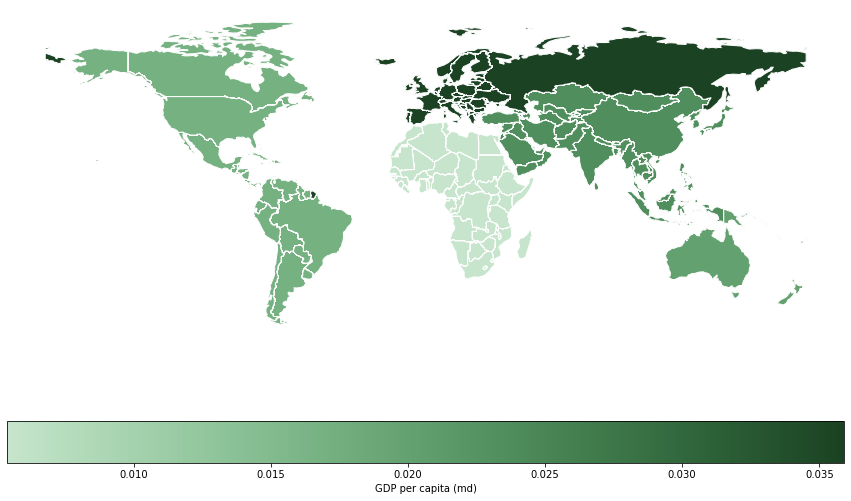

In [57]:
#plot 
import seaborn as sns

colors = sns.cubehelix_palette(start=2, rot=0, dark=0.2, light=.85, reverse=False, as_cmap=True)

ax = region_gdp_per_capita_df_2.plot('region_gdp_per_cap',
                           figsize=(15,10),
                           legend=True,
                           edgecolor="white",cmap=colors,
                           legend_kwds={"label":"GDP per capita (md)", "orientation":"horizontal"})
ax.axis('off')
ax.figure.savefig('Figure4.eps')

### Classification Section

#### Regions with Tfidf Vectorization

In [58]:
#Apply lable per region for confusion matrix later
data_word_vector_df['label'] = data_word_vector_df['Region Name'].apply(lambda x: 0 if x=='Africa' else (1 if x =='Americas' else (2 if x == 'Asia' else(3 if x == 'Europe' else 4))))

#create a train and a test set. While the we use cross validation, we still need a test set for the final confusion matrix
#basically, go back to data_word_vector_df, shuffel it into 70-30 split, do training on 70 and validate on 30, but then also validate the specific regions seperatly
train_set = data_word_vector_df.sample(frac = 0.7, random_state = 8373) 
validation_set = data_word_vector_df.drop(train_set.index)

#check if the lenght adds up
len(train_set) + len(validation_set) == len(data_word_vector_df)
from sklearn.pipeline import Pipeline

In [59]:
#create train and validation lists to be used further
x_train = list(train_set['Speech'])
y_train = list(train_set['label'])

x_validate =list(validation_set['Speech'])
y_validate = list(validation_set['label'])

In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.naive_bayes import ComplementNB
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import GridSearchCV
import warnings
warnings.filterwarnings('ignore') #the grid search gives a lot of warnings about potential issues with small alphas


#make pipeline with two steps, first do vectorization, then use the MNB model
pipe = Pipeline([('tf_idf_vec', TfidfVectorizer() ), ('clf', ComplementNB())])#chose hyper parameters
#select hyper parameters for tuning
hyper_parameters = [{'clf__alpha' : [0.01, 0.1, 0,2, 0.3], 
                    'clf__fit_prior': [True, False], 
                    'clf__norm' : [True, False]}]

#select grid options (7 fold cross validation)
grid = GridSearchCV(pipe, hyper_parameters, cv = 7)

#fit the best model
best_model_region = grid.fit(x_train, y_train)

#check resulting model
print(f'Best Parameters: {best_model_region.best_params_ }')
print(f'Accuracy best model: {best_model_region.best_score_}')
best_model_region_found = best_model_region.best_estimator_

In [ ]:
#make predictions
prediction = best_model_region_found.predict(x_validate) #get predictions
from sklearn.metrics import accuracy_score, precision_score, recall_score
#get metrics
print('Accuracy score: ', accuracy_score(y_validate, prediction))
print('Precision score: ', precision_score(y_validate, prediction, average = None))
print('Recall score: ', recall_score(y_validate, prediction, average = None))

In [ ]:
#create confusion matrix
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt

#get set of regions
regions = ['Africa' ,'Americas' ,'Asia' , 'Europe' , 'Oceania']

#get correlation matrix
mat = confusion_matrix(y_validate, prediction)

print(mat)

fig, ax = plt.subplots()
ax.imshow(mat, cmap='viridis', interpolation='nearest')
ax.set_xlabel('predicted value')
ax.set_ylabel('true value');
ax.set_xticks([0,1,2,3, 4])
ax.set_yticks([0,1,2,3, 4])
ax.set_xticklabels(regions, rotation='vertical')
ax.set_yticklabels(regions)


# Loop over data to create text annotations.
for i in range(len(mat)):
    for j in range(len(mat)):
        text = ax.text(j, i, mat[i, j],
                       ha="center", va="center", color="w")
plt.show()

In [ ]:
ax.figure.savefig('confusionmatrix.png', bbox_inches='tight')

#### Countries with Tfidf Vectorization


In [ ]:
warnings.filterwarnings('ignore') #the grid search gives a lot of warnings about potential issues with small alphas

#make the new y's (country not region this time)
x_train = list(train_set['Speech'])
y_train = list(train_set.reset_index()['Country or Area'])

x_validate =list(validation_set['Speech'])
y_validate = list(validation_set.reset_index()['Country or Area'])

#make pipeline
pipe = Pipeline([('tf_idf_vec', TfidfVectorizer() ), ('clf', ComplementNB())])#chose hyper parameters
#select hyper parameters for tuning
hyper_parameters = [{ #test unigrams, bigrams, and unigrams and bigrams
                    'clf__alpha' : [0.01, 0.1, 0,2, 0.3, 0.4], 
                    'clf__fit_prior': [True, False], 
                    'clf__norm' : [True, False]}]

#select grid options (7 fold cross validation)
grid = GridSearchCV(pipe, hyper_parameters, cv = 7)

#fit the best model
best_model_country = grid.fit(x_train, y_train)

#check resulting model
print(f'Best Parameters: {best_model_country.best_params_ }')
print(f'Accuracy best model: {best_model_country.best_score_}')
best_model_country_found = best_model_country.best_estimator_

In [ ]:
#check model accuracy 
prediction = best_model_country_found.predict(x_validate) #get predictions

print('Accuracy score: ', accuracy_score(y_validate, prediction))
#print('Precision score: ', precision_score(y_validate, prediction, average = None))
#print('Recall score: ', recall_score(y_validate, prediction, average = None))

#### Regions with Count Vect


In [ ]:
from sklearn.feature_extraction.text import CountVectorizer


count_vect = CountVectorizer()


word_count_df_unmerged = count_vect.fit_transform(data_word_vector_df_Count_Vec["Speech"])
speechOnlyDfUnmerged = pd.DataFrame.sparse.from_spmatrix(word_count_df_unmerged,columns=count_vect.get_feature_names())
#Join to create a very nice and handy dataframe of all words with index the country and year

countryYearWordsUnmerged = pd.DataFrame()
countryYearWordsUnmerged = speech_and_countryName_df.join(speechOnlyDfUnmerged)
countryClassifierWordsUnmerged = speech_and_countryName_df.join(speechOnlyDfUnmerged)
# Drop the speech column cause it contains all the info we dont need anymore
countryYearWordsUnmerged= countryYearWordsUnmerged.drop(["Speech"], axis = 1)
countryClassifierWordsUnmerged= countryClassifierWordsUnmerged.drop(["Speech"], axis = 1)
# Index by country and year

countryYearWordsUnmerged.set_index(["Country or Area", "Year"],inplace=True)
countryYearWordsUnmerged.head()
#Drop session and reset index
countryYearWordsUnmerged =  countryYearWordsUnmerged.drop(["Session"], axis= 1)
countryYearWordsUnmerged.reset_index(drop=True,inplace=True)
#Separate the target and inputs
target= countryYearWordsUnmerged["Region Name"]
inputs = countryYearWordsUnmerged.drop("Region Name", axis="columns")


Split the dataset

In [ ]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(inputs, target, test_size=0.2)

Fit our model and check the score


In [ ]:
from sklearn.naive_bayes import ComplementNB

model= ComplementNB(alpha= 0.1, fit_prior=True )
model.fit(x_train,y_train)

model.fit(x_train,y_train)


Conf Matrix

In [ ]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt

predictions = model.predict(x_test)

#get set of regions
regions = ['Africa' ,'Americas' ,'Asia' , 'Europe' , 'Oceania']

#get correlation matrix
mat = confusion_matrix(y_validate, prediction)

print(mat)

fig, ax = plt.subplots()
ax.imshow(mat, cmap='viridis', interpolation='nearest')
ax.set_xlabel('predicted value')
ax.set_ylabel('true value');
ax.set_xticks([0,1,2,3, 4])
ax.set_yticks([0,1,2,3, 4])
ax.set_xticklabels(regions, rotation='vertical')
ax.set_yticklabels(regions)


# Loop over data to create text annotations.
for i in range(len(mat)):
    for j in range(len(mat)):
        text = ax.text(j, i, mat[i, j],
                       ha="center", va="center", color="w")
plt.show()

#### Countries with Count Vec

In [ ]:
from sklearn.model_selection import train_test_split
classTargets = countryClassifierWordsUnmerged["Country or Area"]

classInputs = countryClassifierWordsUnmerged.drop(["Region Name", "Session", "Year","Country or Area"], axis=1)
x_words_train, x_words_test, y_country_train, y_country_test = train_test_split(classInputs, classTargets, test_size=0.2)

complementNBModel = ComplementNB(alpha = 0.1)
complementNBModel.fit(x_words_train,y_country_train)
complementNBModel.score(x_words_test,y_country_test)